In [1]:
#System
import os
import shutil

#Base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from skimage.io import imread, imshow, imsave


#Seed
seed = 99
np.random.seed(seed)
random.seed(seed)

In [4]:
data = pd.read_csv("callbacks/Unet0_05-26_18-00/logger.csv")

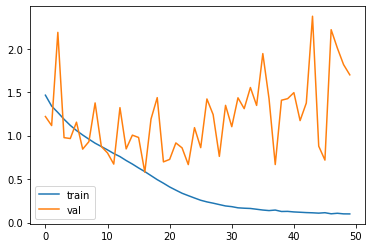

In [6]:
plt.plot(data.epoch, data.loss, label="train")
plt.plot(data.epoch, data.val_loss, label="val")

plt.legend()

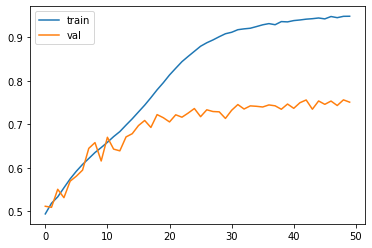

In [10]:
plt.plot(data.epoch, data.dice_coef, label="train")
plt.plot(data.epoch, data.val_dice_coef, label="val")

plt.legend()

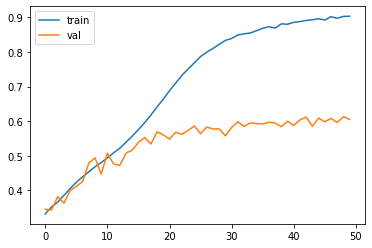

In [11]:
plt.plot(data.epoch, data.jaccard_coef, label="train")
plt.plot(data.epoch, data.val_jaccard_coef, label="val")

plt.legend()